# Task3. Neural networks

Цели лабораторной работы:

Научиться моделировать нейронной сети типа перцептрон.

The process begins by taking all the input values and multiplying them by their weights. Then, all of these multiplied values are added together to create the weighted sum. The weighted sum is then applied to the activation function, producing the perceptron's output. The activation function plays the integral role of ensuring the output is mapped between required values such as (0,1) or (-1,1). It is important to note that the weight of an input is indicative of the strength of a node. Similarly, an input's bias value gives the ability to shift the activation function curve up or down.

Найти достаточное количество скрытых слоев и количество нейронов в сети для обучения в задачах аппроксимации математических функций.

Произвести оценку полученных результатов на тестовой выборке.


# Задание 5.

Смоделировать и обучить нейросеть, аппроксимирующую функцию y = cos(x) + x на отрезке от -5 до 5. Произвести оценку полученных результатов на тестовой выборке.

# Вывод
В результате лабораторной работы был разработан многоуровневый персептрон. Такие сети используются для задач классификации и регрессии. 
Наша ИНС способна проводить аппроксимацию функции cos(x)+x. Для начала создали обучающую выборку на 200 элементов, после чего построили нейронную сеть из 4 скрытых слоев c 15 нейронами на каждом. Сеть проходит 55 итераций обучения с шагом обучения 0.0015, после чего построим на графике обычную функцию cos(x)+x и отметим точки с значениями из получившейся модели, на основании которых можно построить график для аппроксимирующей функции. 

In [10]:
import os
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
 
import tensorflow as tf

class DenseNN(tf.Module):
    def __init__(self, outputs, actf):
        super().__init__()
        self.outputs = outputs
        self.fl_init = False
        self.actf = actf
 
    def __call__(self, x):
        if not self.fl_init:
            self.w = tf.random.truncated_normal((x.shape[-1], self.outputs), stddev=0.1, name="w")
            
            self.w2 = tf.random.truncated_normal((x.shape[-1], self.outputs), stddev=0.1, name="w2")
            
            self.w = tf.Variable(self.w)
            self.w2 = tf.Variable(self.w2)
 
            self.fl_init = True
    
        
        if self.actf == "summ":
             y = x @ self.w + (0 * self.w2)
             y = tf.reduce_sum(y)  
             return y
    
        elif self.actf == "sigmoid":
             y = x @ self.w + (1.0 * self.w2)
        #нелинейная ф-я активации
             y = tf.nn.sigmoid(y)
             return y

In [11]:
import math
import matplotlib.pyplot as plt

l1 = DenseNN(15, actf="sigmoid")
l2 = DenseNN(15, actf="sigmoid")
l3 = DenseNN(15, actf="sigmoid")
l4 = DenseNN(15, actf="sigmoid")
l5 = DenseNN(1, actf="summ")

def model(x):
    y = l1(x)
    y = l2(y)
    y = l3(y)
    y = l4(y)
    y = l5(y)

    return y

# Evenly spaced values on a range, return float
x = np.arange(-5, 5, 0.05,  dtype='f')
x_train = tf.constant(x)

y_train = tf.math.cos(x) + x

# loss function
loss = lambda x, y: tf.reduce_mean(tf.square(x - y))

# learning rate
opt = tf.optimizers.Adam(learning_rate=0.0015)

# iterations
EPOCHS = 55
# learning by gradient climbing
for n in range(EPOCHS):
    for x, y in zip(x_train, y_train):
        x = tf.expand_dims(x, axis=0)
        x = tf.constant(x, shape=(1, 1))
        y = tf.constant(y, shape=(1, 1))
 
        with tf.GradientTape() as tape:
            f_loss = loss(y, model(x))
 
        grads = tape.gradient(f_loss, [l1.trainable_variables, l2.trainable_variables, l3.trainable_variables, l4.trainable_variables, l5.trainable_variables])
    
        opt.apply_gradients(zip(grads[0], l1.trainable_variables))
        opt.apply_gradients(zip(grads[1], l2.trainable_variables))
        opt.apply_gradients(zip(grads[2], l3.trainable_variables))
        opt.apply_gradients(zip(grads[3], l4.trainable_variables))
        opt.apply_gradients(zip(grads[4], l5.trainable_variables))
    print(n, end=" ")

Avg loss tf.Tensor(0.089920655, shape=(), dtype=float32)


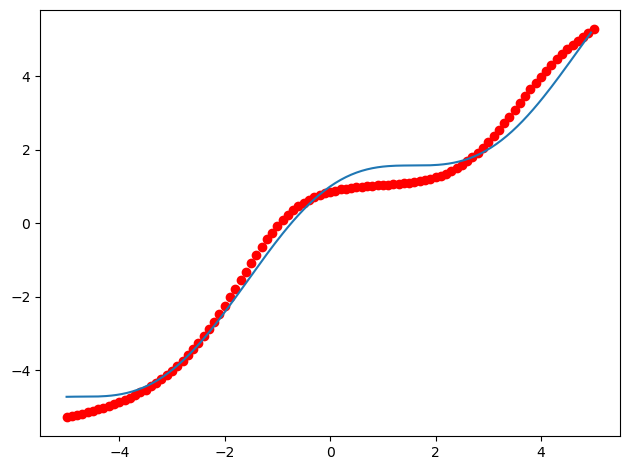

In [13]:
# ideal graph
plt.plot(x_train, y_train)


x_test_arr = []
y_test_arr = []

i = -5.0
step = 0.1
    
plt.tight_layout()

sum_loss = 0
total = 0
    
while(i <= 5.0):
    # print(i, model(tf.constant([[i]])))
    res = model(tf.constant([[i]]))
    x_test_arr.append(i)
    y_test_arr.append(res)
    i +=step
    sum_loss += loss(math.cos(i) + i, res)
    total += 1

print("Avg loss", sum_loss / total)

plt.scatter(x_test_arr, y_test_arr, c='r')
plt.show()